# Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\Infinix\Downloads\Breast_cancer_dataset.csv")

In [3]:
df=df[['id','radius_mean','perimeter_mean']]
df.sample(4)

,id,radius_mean,perimeter_mean
440,909411,10.97,71.73
301,892604,12.46,80.43
240,88350402,13.64,87.38
154,8711002,13.15,85.31


# Step 1:- Basic Inspection

In [4]:
from IPython.display import Markdown, display
display(Markdown(f"## 📊 DataFrame Information📊"))
print(df.info())
print(" ")
shape=df.shape
display(Markdown(f"## 📊 Shape of Dataframe is :{shape}📊"))
print(f'Shape  :{shape}')
print(" ")
null_value=df.isnull().sum()
display(Markdown(f"## 📊 Column wise null value"))
print( null_value)
print(" ")
display(Markdown(f"## 📊DataFrame-Summary "))
print("")
print(df.describe())
print(" ")
duplicate=df['id'].duplicated().sum()
display(Markdown(f"## 📊 Duplicate value  📊"))

print(f'Duplicate value is :{duplicate}')

## 📊 DataFrame Information📊

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              569 non-null    int64  
 1   radius_mean     569 non-null    float64
 2   perimeter_mean  569 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 13.5 KB
None
 


## 📊 Shape of Dataframe is :(569, 3)📊

Shape  :(569, 3)
 


## 📊 Column wise null value

id                0
radius_mean       0
perimeter_mean    0
dtype: int64
 


## 📊DataFrame-Summary 


                 id  radius_mean  perimeter_mean
count  5.690000e+02   569.000000      569.000000
mean   3.037183e+07    14.127292       91.969033
std    1.250206e+08     3.524049       24.298981
min    8.670000e+03     6.981000       43.790000
25%    8.692180e+05    11.700000       75.170000
50%    9.060240e+05    13.370000       86.240000
75%    8.813129e+06    15.780000      104.100000
max    9.113205e+08    28.110000      188.500000
 


## 📊 Duplicate value  📊

Duplicate value is :0


# Step 2:- Explore

In [5]:
feature=df['radius_mean']
target=df['perimeter_mean']

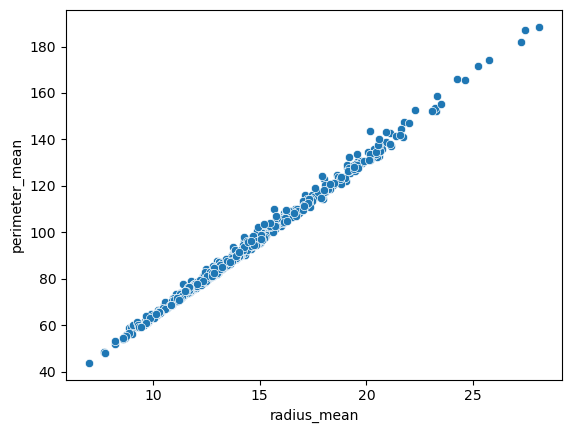

In [6]:
sns.scatterplot(x=feature, y=target, data=df)
plt.show()

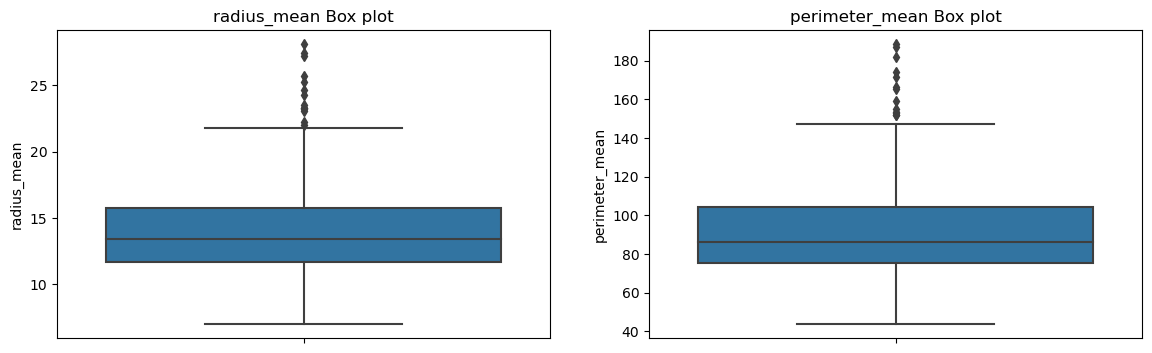

In [7]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(y=df['radius_mean'])
plt.title("radius_mean Box plot")
plt.subplot(1,2,2)
sns.boxplot(y=df['perimeter_mean'])
plt.title("perimeter_mean Box plot")
plt.show()

In [8]:
def outliers(col):
    q25=df[col].quantile(0.25)
    q75=df[col].quantile(0.75)
    
    iqr=q75-q25
    upper_limit=q75+1.5*iqr
    lower_limit=q25-1.5*iqr
    high_outliers=len(df[df[col]>upper_limit])
    lower_outliers=len(df[df[col]<lower_limit])
    Total_Outliers=high_outliers+lower_outliers
    print(f"Total_Outliers using IQR method is : {Total_Outliers}")
    


In [9]:
for col in df.columns[1:]:
    display(Markdown(f"{col} outliers"))
    outliers(col)


radius_mean outliers

Total_Outliers using IQR method is : 14


perimeter_mean outliers

Total_Outliers using IQR method is : 13


## Step 3 :- Train_Test_Split

In [10]:
X=df[['radius_mean']]
y=df['perimeter_mean']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [11]:
y_train

68      58.79
181    142.70
63      59.20
248     68.01
60      64.55
        ...  
71      58.79
106     75.17
270     90.30
435     91.12
102     77.22
Name: perimeter_mean, Length: 455, dtype: float64

## Step 4:- FIT

In [12]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)

print(f"X_train shape is :",X_train_sm.shape)
print(f"X_test shape is :",X_test.shape)

model_train_sm=sm.OLS(y_train,X_train_sm).fit()


print(model_train_sm.summary())

X_train shape is : (455, 2)
X_test shape is : (114, 1)
                            OLS Regression Results                            
Dep. Variable:         perimeter_mean   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.050e+05
Date:                Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:03:01   Log-Likelihood:                -857.22
No. Observations:                 455   AIC:                             1718.
Df Residuals:                     453   BIC:                             1727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [13]:
from sklearn.linear_model import LinearRegression

# Initialize model
model_skl = LinearRegression()

# Fit model
model_skl.fit(X_train, y_train)

# Coefficients
print("Intercept:", model_skl.intercept_)
print("Slope:", model_skl.coef_[0])

# Predictions on train and test
y_train_pred = model_skl.predict(X_train)
y_test_pred = model_skl.predict(X_test)


Intercept: -5.020848584173933
Slope: 6.863974682090257


## Step 5:-Diagnostics

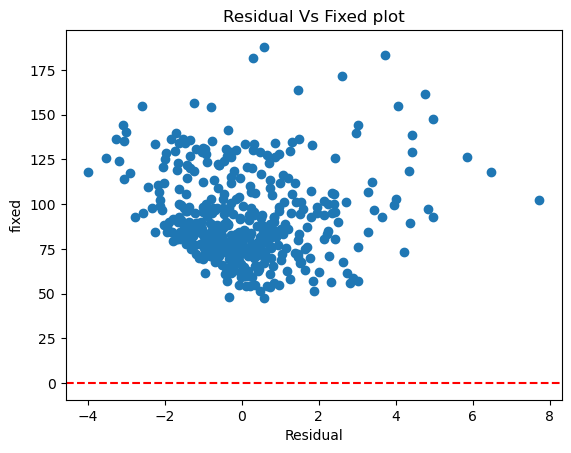

In [14]:
# Residuals plot
Residual= y_train-y_train_pred
fixed=y_train_pred
plt.scatter(Residual,fixed)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel("Residual")
plt.ylabel("fixed")
plt.title("Residual Vs Fixed plot")
plt.show()


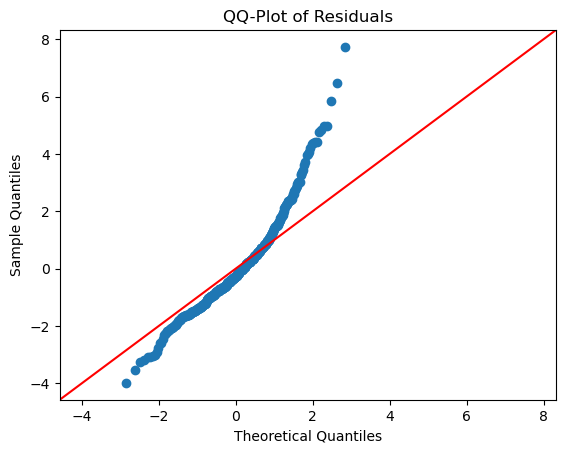

In [15]:
sm.qqplot(Residual,line='45')
plt.title('QQ-Plot of Residuals')
plt.show()

In [16]:
from statsmodels.stats.diagnostic import het_breuschpagan 

def heteroscedasticity_check(y_train):
    
    Residual= y_train-y_train_pred  
    lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(Residual, sm.add_constant(X_train))
    print("LM stat:", lm_stat)
    print("LM p-value:", lm_pvalue)
    print("F-stat:", f_stat)
    print("F p-value:", f_pvalue)


    if lm_pvalue>0.05: 
        print("No heteroscedesticity")
    else:
        print("Heteroscedesticity Present")

    if f_pvalue>0.05: 
        print("No heteroscedesticity")
    else:
        print("Heteroscedesticity Present")

        

In [17]:
heteroscedasticity_check(y_train)

LM stat: 34.76600282374158
LM p-value: 3.718098480993224e-09
F-stat: 37.476737686573564
F p-value: 2.0062839066519626e-09
Heteroscedesticity Present
Heteroscedesticity Present


## Step 6:- Fix voilations

In [18]:
import numpy as np

y_train_log = np.log(y_train)  # log transform
model_log = sm.OLS(y_train_log, sm.add_constant(X_train)).fit()
y_train_pred = model_log.predict(sm.add_constant(X_train))

print(model_log.summary())


heteroscedasticity_check(y_train_log)

                            OLS Regression Results                            
Dep. Variable:         perimeter_mean   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.616e+04
Date:                Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:03:01   Log-Likelihood:                 803.90
No. Observations:                 455   AIC:                            -1604.
Df Residuals:                     453   BIC:                            -1596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.5011      0.008    437.395      

In [19]:
model_robust = sm.OLS(y_train, sm.add_constant(X_train)).fit(cov_type='HC3')
print(model_robust.summary())


                            OLS Regression Results                            
Dep. Variable:         perimeter_mean   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 6.558e+04
Date:                Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:03:01   Log-Likelihood:                -857.22
No. Observations:                 455   AIC:                             1718.
Df Residuals:                     453   BIC:                             1727.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.0208      0.350    -14.345      

In [20]:
heteroscedasticity_check(y_train)

LM stat: 438.07511757992154
LM p-value: 2.8403828470374903e-97
F-stat: 11725.223451377127
F p-value: 0.0
Heteroscedesticity Present
Heteroscedesticity Present


In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
y_train_yj = pt.fit_transform(y_train.values.reshape(-1,1))


In [22]:
y_train_yj 

array([[-1.80284750e+00],
       [ 1.75668865e+00],
       [-1.76809653e+00],
       [-1.09977672e+00],
       [-1.34571804e+00],
       [ 3.96196316e-01],
       [ 3.68045815e-01],
       [-7.73025479e-01],
       [-4.70028483e-01],
       [ 1.46816623e+00],
       [-3.87879668e-01],
       [ 1.65248458e+00],
       [ 4.71453007e-01],
       [-1.58049428e+00],
       [-9.79140986e-02],
       [ 1.40129813e+00],
       [ 1.26390388e+00],
       [ 6.49702355e-01],
       [ 1.65791521e-01],
       [-6.96200852e-01],
       [ 4.53141460e-01],
       [ 6.16969318e-01],
       [ 2.56961544e-02],
       [-1.18920781e+00],
       [ 3.57510159e-01],
       [ 3.04999970e-01],
       [-9.07174362e-01],
       [ 1.45546579e+00],
       [-1.25820032e+00],
       [-2.76968065e-01],
       [ 5.04796276e-02],
       [-1.61409736e-01],
       [ 1.10561930e+00],
       [ 1.57199164e+00],
       [ 4.82298944e-01],
       [ 3.81167043e-02],
       [ 4.17304639e-01],
       [-4.68924705e-01],
       [-2.4

In [23]:
# heteroscedasticity_check for multiple transformations comparision
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

def heteroscedasticity_check(X, y, model=None, transformations=["none", "log", "sqrt", "boxcox", "yeojohnson"]):
    """
    Test heteroscedasticity for different transformations of y.
    
    Parameters:
    X : DataFrame or ndarray
        Features
    y : Series or ndarray
        Target
    model : statsmodels model class (optional, default: OLS)
    transformations : list of str
        ["none", "log", "sqrt", "boxcox", "yeojohnson"]
        
    Returns:
    DataFrame with LM stat, LM p-value, F-stat, F p-value, and verdict for each transformation.
    """
    
    if model is None:
        model = sm.OLS  # default Ordinary Least Squares

    X = sm.add_constant(X)  # add intercept if not present
    y = np.array(y).flatten()

    results = []

    for trans in transformations:
        y_trans = y.copy()
        trans_applied = trans

        try:
            if trans == "log":
                y_trans = np.log(y + 1e-6)  # avoid log(0)
            elif trans == "sqrt":
                y_trans = np.sqrt(y)
            elif trans == "boxcox":
                if np.any(y <= 0):
                    trans_applied = "boxcox (skipped - non-positive values)"
                    continue
                y_trans, _ = boxcox(y)
            elif trans == "yeojohnson":
                pt = PowerTransformer(method="yeo-johnson")
                y_trans = pt.fit_transform(y.reshape(-1, 1)).flatten()

            # Fit model
            fitted_model = model(y_trans, X).fit()

            # Breusch–Pagan test
            lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(fitted_model.resid, fitted_model.model.exog)

            verdict = "Heteroscedasticity Present" if lm_pvalue < 0.05 else "No Heteroscedasticity"

            results.append({
                "Transformation": trans_applied,
                "LM Stat": lm_stat,
                "LM p-value": lm_pvalue,
                "F-stat": f_stat,
                "F p-value": f_pvalue,
                "Verdict": verdict
            })
        
        except Exception as e:
            results.append({
                "Transformation": trans_applied,
                "LM Stat": None,
                "LM p-value": None,
                "F-stat": None,
                "F p-value": None,
                "Verdict": f"Error: {e}"
            })

    return pd.DataFrame(results)

# Example usage:
# comparison_df = heteroscedasticity_check(X_train, y_train)
# print(comparison_df)


In [33]:
heteroscedasticity_check(X_train, y_train, model=None, transformations=[ "yeojohnson"])

,Transformation,LM Stat,LM p-value,F-stat,F p-value,Verdict
0,yeojohnson,5.799477,0.016031,5.848531,0.015983,Heteroscedasticity Present


In [25]:
heteroscedasticity_check(X, y, model=None, transformations=["log"])

,Transformation,LM Stat,LM p-value,F-stat,F p-value,Verdict
0,log,10.510972,0.001187,10.671152,0.001154,Heteroscedasticity Present


In [32]:
heteroscedasticity_check(X_train, y_train, model=None, transformations= ["sqrt"])

,Transformation,LM Stat,LM p-value,F-stat,F p-value,Verdict
0,sqrt,28.325188,1.025528e-07,30.07281,6.928035e-08,Heteroscedasticity Present


In [35]:
heteroscedasticity_check(X, y, model=None, transformations=["boxcox"])

,Transformation,LM Stat,LM p-value,F-stat,F p-value,Verdict
0,boxcox,2.443313,0.118027,2.445225,0.118441,No Heteroscedasticity


In [28]:
heteroscedasticity_check(X, y, model=None, transformations=["none"])

,Transformation,LM Stat,LM p-value,F-stat,F p-value,Verdict
0,none,38.620186,5.148371e-10,41.286725,2.787874e-10,Heteroscedasticity Present


In [40]:
lam

-0.5223645710919863

In [39]:
from scipy import stats
y_train_transformed, lam = stats.boxcox(y_train)  # if Box-Cox was best
model_final = sm.OLS(y_train_transformed, sm.add_constant(X_train)).fit()


# 5 Predict on test set (predictions will be in transformed scale)
y_pred_transformed = model_final.predict(sm.add_constant(X_test))

# 6 Convert predictions back to original scale
# Inverse Box-Cox
from scipy.special import inv_boxcox

y_pred_original = inv_boxcox(y_pred_transformed, lam)


# Step 7:- Checking Influential points

In [43]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# 1. Fit model again (original or transformed y, jo tum use kar rahe ho)
model = sm.OLS(y_train_transformed, sm.add_constant(X_train)).fit()

# 2. Get influence measures
influence = model.get_influence()

# Studentized residuals
student_resid = influence.resid_studentized_external

# Leverage values
leverage = influence.hat_matrix_diag

# Cook’s Distance
cooks_d, pvals = influence.cooks_distance

# 3. Create a dataframe for easy inspection
influence_df = pd.DataFrame({
    "Studentized Residuals": student_resid,
    "Leverage": leverage,
    "Cooks_Distance": cooks_d
})

# 4. Thresholds (rules of thumb)
outliers = influence_df[np.abs(influence_df["Studentized Residuals"]) > 3]  # |resid| > 3
high_leverage = influence_df[influence_df["Leverage"] > (2*X_train.shape[1]/X_train.shape[0])]  
influential = influence_df[influence_df["Cooks_Distance"] > 4/X_train.shape[0]]

print("Potential Outliers (Studentized Residuals > 3):")
print(len(outliers))

print("\nHigh Leverage Points:")
print(len(high_leverage))

print("\nInfluential Points (Cook’s Distance > 4/n):")
print(len(influential))


Potential Outliers (Studentized Residuals > 3):
7

High Leverage Points:
137

Influential Points (Cook’s Distance > 4/n):
33


# Step 8:- Evaluting metrics

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mean of target variable in training set
target_mean_train = y_train.mean()
print(f"Training Target Mean: {target_mean_train:.4f}")


# MSE
mse = mean_squared_error(y_test, y_pred_original)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(y_test, y_pred_original)

# R² Score
r2 = r2_score(y_test, y_pred_original)

# MAPE
mape = np.mean(np.abs((y_test - y_pred_original) / y_test)) * 100

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Training Target Mean: 91.8822
Mean Squared Error (MSE): 55.0006
Root Mean Squared Error (RMSE): 7.4162
Mean Absolute Error (MAE): 4.2817
R-squared (R²): 0.9061
Mean Absolute Percentage Error (MAPE): 4.42%


# Step 9:- Model Validation

In [31]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Sklearn model
lr = LinearRegression()

scores = cross_val_score(lr, X_train, y_train_transformed, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Cross-Validation RMSEs:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())


Cross-Validation RMSEs: [0.00673251 0.00522317 0.00625093 0.0053943  0.00622763]
Average RMSE: 0.005965708466153319


# Step 10:- Comparing Results

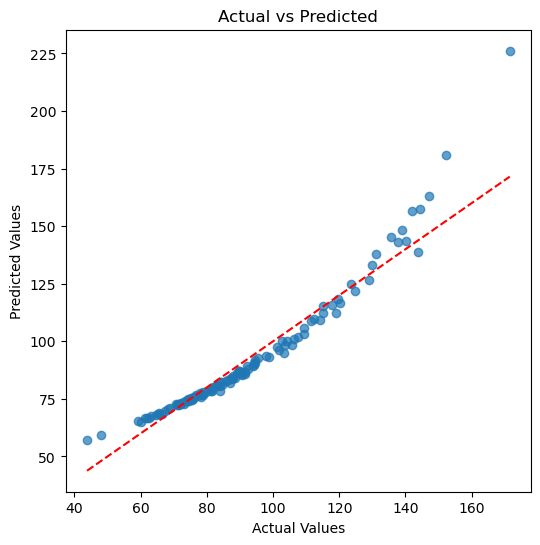

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_original, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


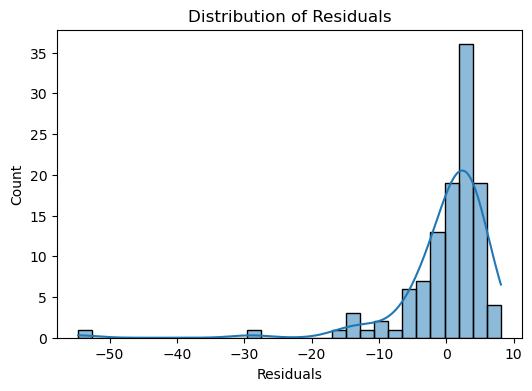

In [49]:
import seaborn as sns

residuals = y_test - y_pred_original
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()


# Step 11:- Retrain and save-full model

In [50]:
# Apply same λ to transform test / full y
y_full_transformed = boxcox(y + 1e-6, lmbda=lam)


In [51]:
model_final = sm.OLS(y_full_transformed, sm.add_constant(X)).fit()

In [52]:
import pickle
pickle.dump(model_final, open("final_model.pkl", "wb"))
